In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
from scipy.optimize import curve_fit
import sympy as sp
%matplotlib inline

In [49]:
rc('font', family='Comic Sans MS')
Neon = pd.read_csv("Neon.csv")
stopien = np.pi/180
minuta = stopien/60
alpha_0 = 45*stopien +30*minuta
Na_zolte = 346*stopien + 50*minuta
Na_zielone = 345*stopien+ 30*minuta
D_miarki = 2*minuta
D_obserwatora = 2*minuta
D_kat = np.sqrt(D_miarki**2+D_obserwatora**2)
AL = 176*stopien
AP = 56*stopien
kat_lamiacy = (AL - AP)/2
D_kat_lamiacy = np.sqrt(2)*D_kat/2

In [4]:
print(Neon.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  lambda[nm] &  alpha[circ] &  alpha[min] \\
\midrule
0  &         654 &          348 &          18 \\
1  &         651 &          348 &          10 \\
2  &         641 &          348 &           0 \\
3  &         614 &          347 &          46 \\
4  &         610 &          347 &          40 \\
5  &         603 &          347 &          26 \\
6  &         591 &          347 &          10 \\
7  &         588 &          347 &           0 \\
8  &         540 &          346 &          20 \\
9  &         534 &          346 &          10 \\
10 &         470 &          345 &          48 \\
11 &         454 &          344 &          44 \\
\bottomrule
\end{tabular}



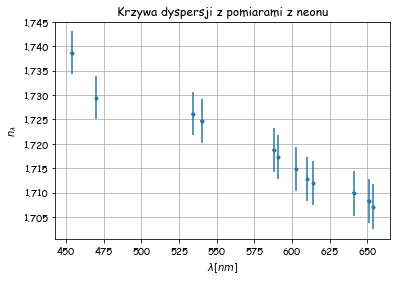

In [75]:
Neon_kat =2*np.pi-(Neon['alpha[circ]']*stopien+Neon['alpha[min]']*minuta)+alpha_0
D_neon_kat = 30*minuta
n_neon = np.sin((Neon_kat+kat_lamiacy)/2)/np.sin(kat_lamiacy/2)
plt.errorbar(Neon['lambda[nm]'],n_neon,cala_delta_n,1,'.')
plt.xlabel(r'$\lambda[nm]$'); plt.ylabel(r'$n_{\lambda}$')
plt.grid()
plt.title('Krzywa dyspersji z pomiarami z neonu')
plt.savefig('dyspersja.png')

In [56]:
zmienne = kat_lamiacy_analityczne, Neon_kat_analityczne = sp.symbols('phi, epsilon_0',real=True)
n_analitycznie = sp.sin((Neon_kat_analityczne+kat_lamiacy_analityczne)/2)/sp.sin(kat_lamiacy_analityczne/2)
pochodna_phi = n_analitycznie.diff(kat_lamiacy_analityczne).simplify()
pochodna_phi

sin(epsilon_0/2)/(cos(phi) - 1)

In [57]:
funkcja_phi = sp.lambdify(zmienne,pochodna_phi,modules='numpy')
wklad_phi =(funkcja_phi(kat_lamiacy,Neon_kat)*D_kat_lamiacy)**2
wklad_phi

0     3.102304e-07
1     3.115555e-07
2     3.132147e-07
3     3.155427e-07
4     3.165423e-07
5     3.188788e-07
6     3.215565e-07
7     3.232339e-07
8     3.299734e-07
9     3.316657e-07
10    3.353989e-07
11    3.463382e-07
dtype: float64

In [58]:
pochodna_epsilon = n_analitycznie.diff(Neon_kat_analityczne).simplify()
pochodna_epsilon

cos(epsilon_0/2 + phi/2)/(2*sin(phi/2))

In [59]:
funkcja_epsilon = sp.lambdify(zmienne,pochodna_epsilon,modules='numpy')
wklad_epsilon =(funkcja_epsilon(kat_lamiacy,Neon_kat)*D_neon_kat)**2
cala_delta_n = wklad_epsilon+wklad_phi
cala_delta_n **= 0.5
print(cala_delta_n)

0     0.004581
1     0.004572
2     0.004562
3     0.004547
4     0.004540
5     0.004526
6     0.004509
7     0.004498
8     0.004455
9     0.004445
10    0.004421
11    0.004353
dtype: float64


In [60]:
D_epsilon = D_neon_kat*np.cos((Neon_kat+kat_lamiacy)/2)/2*np.sin(kat_lamiacy/2)
D_phi = D_kat_lamiacy*(np.cos((Neon_kat+kat_lamiacy)/2)*np.sin(kat_lamiacy/2)-\
                       np.cos(kat_lamiacy/2)*np.sin((Neon_kat+kat_lamiacy)/2))/(2*np.sin(kat_lamiacy/2)**2)
D_ostateczne = np.sqrt(D_epsilon**2+D_phi**2)
D_ostateczne

0     0.001266
1     0.001264
2     0.001263
3     0.001260
4     0.001259
5     0.001257
6     0.001254
7     0.001252
8     0.001245
9     0.001243
10    0.001239
11    0.001228
dtype: float64

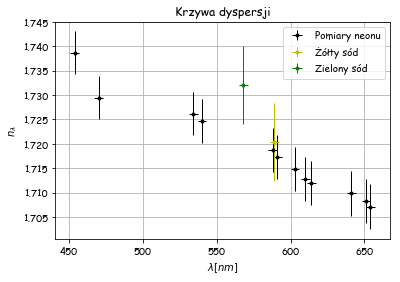

In [83]:
plt.errorbar(Neon['lambda[nm]'],n_neon,cala_delta_n,3,'k.',label='Pomiary neonu',elinewidth=1)
plt.xlabel(r'$\lambda[nm]$'); plt.ylabel(r'$n_{\lambda}$'); plt.grid(); plt.title('Krzywa dyspersji')
plt.savefig('dyspersja.png')

# parametry1, kowariancja1 = np.polyfit(Neon['lambda[nm]'],n_neon,1,w=1/cala_delta_n,cov=True)
# niepewnosci1 = np.diag(kowariancja1)**0.5
# plt.plot(Neon['lambda[nm]'],
#          np.polyval(parametry1, Neon['lambda[nm]']))
# plt.fill_between(Neon['lambda[nm]'],
#                  np.polyval(parametry1-niepewnosci1,
#                  Neon['lambda[nm]']),
#                  np.polyval(parametry1+niepewnosci1, Neon['lambda[nm]']),
#                  alpha=0.5)


n_Na_zolte = np.sin((2*np.pi-Na_zolte+alpha_0+kat_lamiacy)/2)/np.sin(kat_lamiacy/2)
D_n_Na_zolte = np.sqrt((funkcja_epsilon(kat_lamiacy,Na_zolte)*D_neon_kat)**2+\
                       (funkcja_phi(kat_lamiacy,Na_zolte)*D_kat_lamiacy)**2)
n_Na_zielone = np.sin((2*np.pi-Na_zielone+alpha_0+kat_lamiacy)/2)/np.sin(kat_lamiacy/2)
D_n_Na_zielone = np.sqrt((funkcja_epsilon(kat_lamiacy,Na_zielone)*D_neon_kat)**2+\
                       (funkcja_phi(kat_lamiacy,Na_zielone)*D_kat_lamiacy)**2)
plt.errorbar(589,n_Na_zolte,D_n_Na_zolte,3,'y.',label='Żółty sód',elinewidth=1)
plt.errorbar(568,n_Na_zielone,D_n_Na_zielone,3,'g.',label='Zielony sód',elinewidth=1)
plt.legend(loc='best')
plt.savefig('Punkty.png')